In [1]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Show all columns
pd.set_option('display.max_columns', None)
# LazyPredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Load dataset into a pandas DataFrame
data = pd.read_csv('C:/Users/mathi/OneDrive/Skrivebord/2_Sem_Kand/Projekt_Kandidat2/Projekt_Kandidat2/DataPreb/DataPSGonly.csv')
# data = pd.read_csv('C:/Users/mathi/OneDrive/Skrivebord/2_Sem_Kand/Projekt_Kandidat2/Projekt_Kandidat2/DataPreb/DataPSGandDetektion.csv')

# Lazy Predict - Supervised Machine Learning
X = data[['AVGHR', 'AVGRR', 'AVGACT', 'SLEEPSCORE', 'DURATIONINBED', 'DURATIONAWAKE', 'DURATIONINSLEEP', 'DURATIONINREM', 'DURATIONINLIGHT', 'DURATIONINDEEP', 'DURATIONSLEEPONSET', 'BEDEXITDURATION', 'BEDEXITCOUNT', 'TOSSNTURNCOUNT', 'FROMGMTOFFSET', 'MINHR', 'MAXHR', 'MINRR', 'MAXRR', 'FMCOUNT', 'AWAKENINGS', 'HRVSCORE', 'HRVLF', 'HRVHF', 'HRVRMSSDEVENING', 'HRVRMSSDMORNING', 'BPSYS', 'BPDIA', 'HR', 'WEIGHT', 'STEPS', 'NYHABL', 'AGEBL', 'WEIGHTBL', 'HEIGHTBL', 'BPSYSBL', 'BPDIABL', 'HRB', 'EFTITBL', 'EJREHABBL', 'EJFINISHBL', 'GENDER']]
y = data['SLEEPAPNEA']

patient_ids = data['patient_ID']

## Alle nætter = 4426 
test = [571, 584, 612] # Nætter søvnapnø = 95
train = [510, 459, 431] # Nætter søvnapnø = 627

# Find unikke patient-ID'er
unique_patients = np.unique(patient_ids)

# Fjern train_patients fra unique_patients og test_patients fra unique_patients
unique_patients = unique_patients[~np.isin(unique_patients, train)]
unique_patients = unique_patients[~np.isin(unique_patients, test)]

# Opdel patient-ID'er i træning og test
train_patients, test_patients = train_test_split(unique_patients, test_size=0.2, random_state=42)

# Tilføj train til train_patients og test til test_patients
train_patients = np.append(train_patients, train)
test_patients = np.append(test_patients, test)

# Opdel data efter patient-ID
X_train = X[patient_ids.isin(train_patients)]
y_train = y[patient_ids.isin(train_patients)]
X_test = X[patient_ids.isin(test_patients)]
y_test = y[patient_ids.isin(test_patients)]

# Opret en instans af StandardScaler
scaler = StandardScaler()

# Skalér træningsdata
X_train_scaled = scaler.fit_transform(X_train)

# Skalér testdata
X_test_scaled = scaler.transform(X_test)

# Opret en instans af LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Træn og evaluer modeller
models, predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)

models

100%|██████████| 29/29 [00:07<00:00,  3.67it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.88,0.50,0.50,0.82,0.84
ExtraTreesClassifier,0.88,0.50,0.50,0.82,0.38
RandomForestClassifier,0.88,0.50,0.50,0.82,0.90
QuadraticDiscriminantAnalysis,0.88,0.50,0.50,0.82,0.07
GaussianNB,0.88,0.50,0.50,0.82,0.03
LGBMClassifier,0.88,0.50,0.50,0.82,0.31
DummyClassifier,0.88,0.50,0.50,0.82,0.03
CalibratedClassifierCV,0.88,0.50,0.50,0.82,0.31
BernoulliNB,0.88,0.50,0.50,0.82,0.03


<AxesSubplot: >

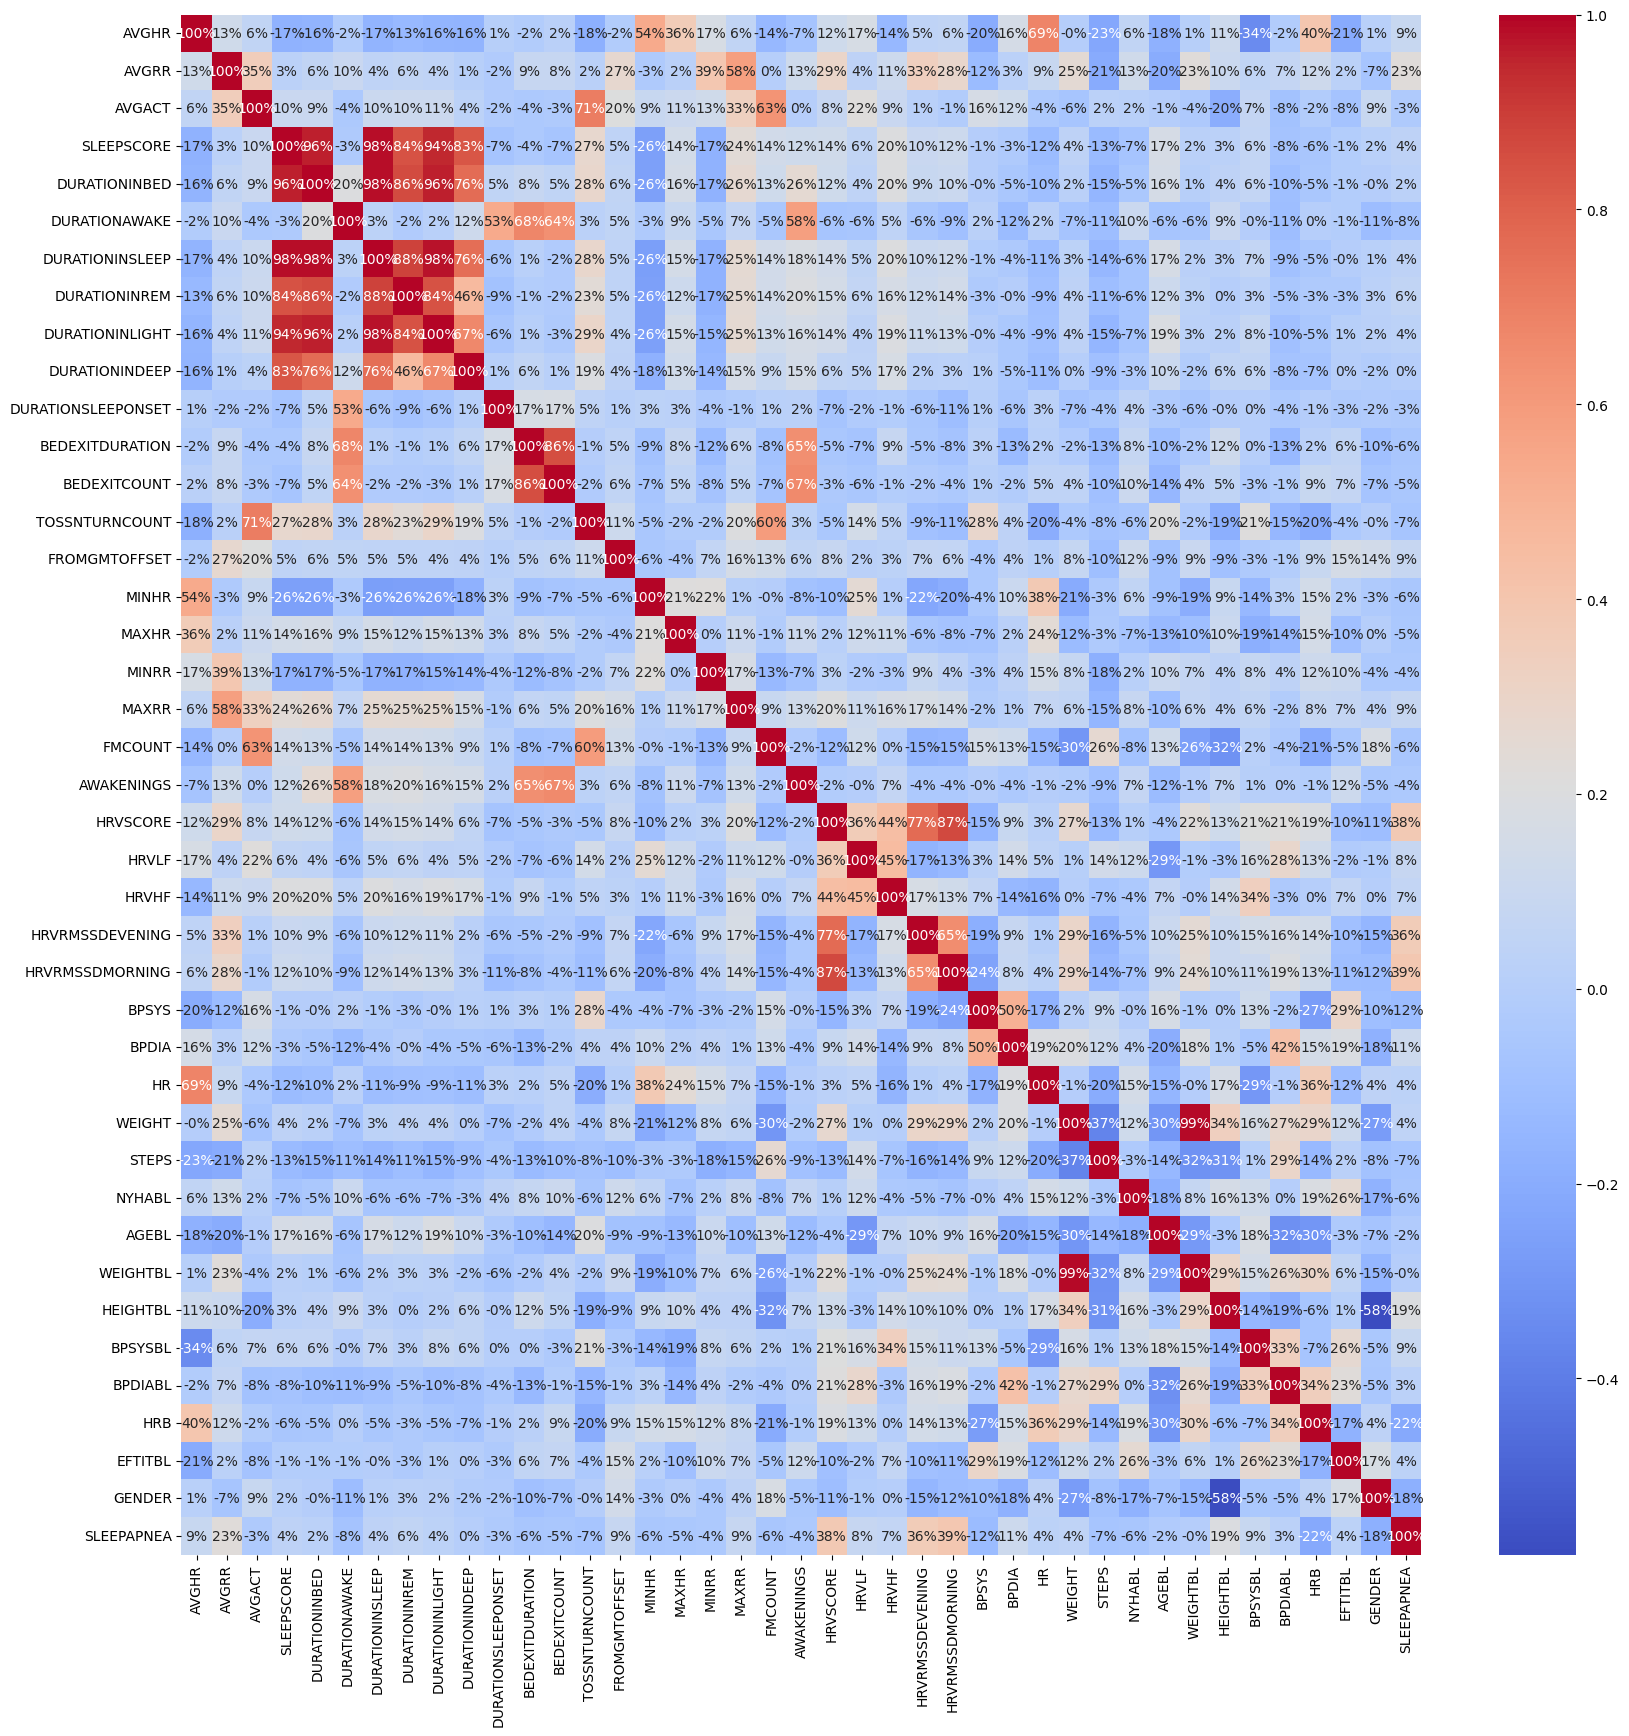

In [3]:
plt.figure(figsize=(20, 20))
# Only keep these columns [['AVGHR', 'AVGRR', 'AVGACT', 'SLEEPSCORE', 'DURATIONINBED', 'DURATIONAWAKE', 'DURATIONINSLEEP', 'DURATIONINREM', 'DURATIONINLIGHT', 'DURATIONINDEEP', 'DURATIONSLEEPONSET', 'BEDEXITDURATION', 'BEDEXITCOUNT', 'TOSSNTURNCOUNT', 'FROMGMTOFFSET', 'MINHR', 'MAXHR', 'MINRR', 'MAXRR', 'FMCOUNT', 'AWAKENINGS', 'HRVSCORE', 'HRVLF', 'HRVHF', 'HRVRMSSDEVENING', 'HRVRMSSDMORNING', 'BPSYS', 'BPDIA', 'HR', 'WEIGHT', 'STEPS', 'NYHABL', 'AGEBL', 'WEIGHTBL', 'HEIGHTBL', 'BPSYSBL', 'BPDIABL', 'HRB', 'EFTITBL', 'EJREHABBL', 'EJFINISHBL', 'GENDER', 'SLEEPAPNEA']]
data = data[['AVGHR', 'AVGRR', 'AVGACT', 'SLEEPSCORE', 'DURATIONINBED', 'DURATIONAWAKE', 'DURATIONINSLEEP', 'DURATIONINREM', 'DURATIONINLIGHT', 'DURATIONINDEEP', 'DURATIONSLEEPONSET', 'BEDEXITDURATION', 'BEDEXITCOUNT', 'TOSSNTURNCOUNT', 'FROMGMTOFFSET', 'MINHR', 'MAXHR', 'MINRR', 'MAXRR', 'FMCOUNT', 'AWAKENINGS', 'HRVSCORE', 'HRVLF', 'HRVHF', 'HRVRMSSDEVENING', 'HRVRMSSDMORNING', 'BPSYS', 'BPDIA', 'HR', 'WEIGHT', 'STEPS', 'NYHABL', 'AGEBL', 'WEIGHTBL', 'HEIGHTBL', 'BPSYSBL', 'BPDIABL', 'HRB', 'EFTITBL', 'GENDER', 'SLEEPAPNEA']]

sns.heatmap(data.corr(), annot=True, fmt='.0%', cmap='coolwarm')